In [1]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
import os
import re
import numpy as np
import pandas as pd
from tqdm.autonotebook import tqdm
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import unidecode
import codecs
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
train_df = pd.read_csv('train.csv')

In [3]:
vectorizer = CountVectorizer(stop_words='english')
count_m = vectorizer.fit_transform(train_df['title'])

In [4]:
count_df = pd.DataFrame({'tokens': vectorizer.get_feature_names(), 'count': count_m.toarray().sum(axis=0).tolist()})
count_df.sort_values(by='count', ascending=True, inplace=True)

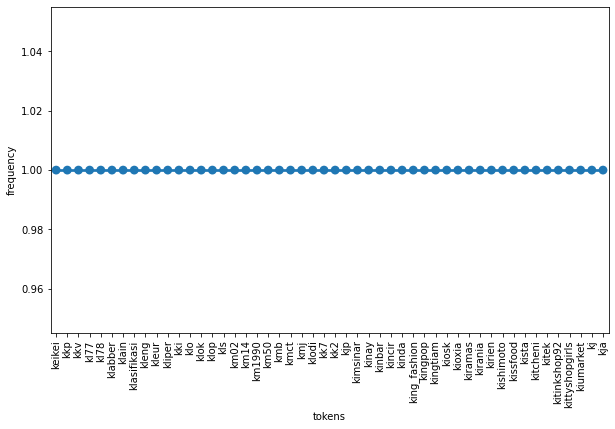

In [5]:
plt.figure(figsize = (10, 6))
sns.pointplot(x=count_df['tokens'][:50], y=count_df['count'][:50], linestyles="-")
plt.xlabel("tokens")
plt.ylabel("frequency")
plt.xticks(rotation=90)
plt.show()

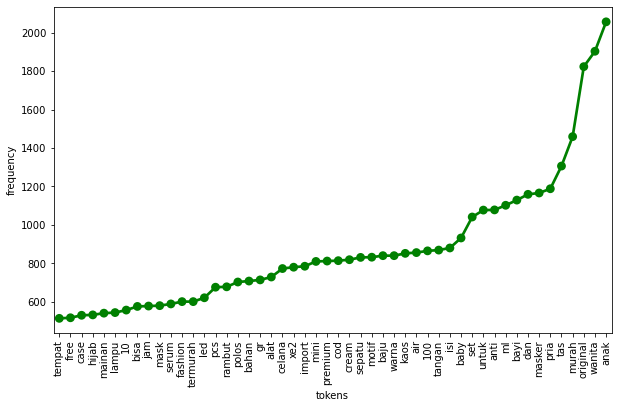

In [10]:
plt.figure(figsize = (10, 6))
sns.pointplot(x=count_df['tokens'][-50:], y=count_df['count'][-50:], color = "green", linestyles="-")
plt.xlabel("tokens")
plt.ylabel("frequency")
plt.xticks(rotation=90)
plt.show()

Here, there is alot of numbers, punctuation, consecutive characters. Hence, cleaning this data.

Dropping all the alphanumeric tokens
Fixing consecutive characters
Applied regex to filter non-alphabetic content from tokens

In [7]:
digit_check = re.compile('\d')
def check_alpha_num(token):
    # check if the token id alphanumeric
    return bool(digit_check.search(token))
def handle_consecutive_char(string):
    # check & fix for 3 or more consecutive characters
    return re.sub(r'(.)\1+\1+', r'\1', string)

In [8]:
tqdm.pandas()
train_df['title'] = train_df['title'].progress_apply(lambda x: ' '.join(handle_consecutive_char(i) for i in str(
                re.sub('[^A-Za-z0-9]', ' ', x.lower().strip())).split() if i.strip() and not check_alpha_num(i.strip()) and not (i.strip(
                ) == len(i.strip()) * i.strip()[0])))

  0%|          | 0/34250 [00:00<?, ?it/s]

In [9]:
train_df.to_csv('df_train.csv')